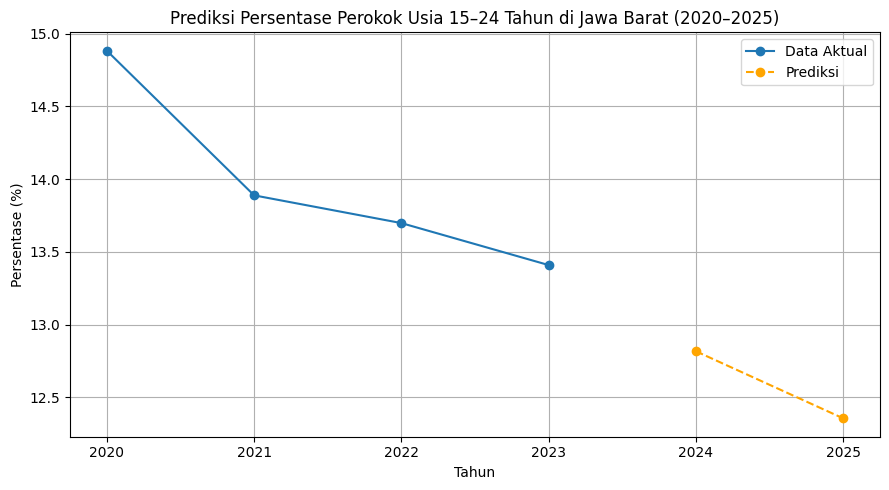

   Tahun  Prediksi Persentase
0   2024            12.817143
1   2025            12.356000


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# === 1. Baca file CSV untuk masing-masing tahun ===
df_2020 = pd.read_csv("data_csv/2020.csv")
df_2021 = pd.read_csv("data_csv/2021.csv")
df_2022 = pd.read_csv("data_csv/2022.csv")
df_2023 = pd.read_csv("data_csv/2023.csv")

# === 2. Hitung rata-rata persentase perokok usia 15–24 tahun per tahun ===
mean_2020 = df_2020.iloc[:, 1].astype(float).mean()
mean_2021 = df_2021.iloc[:, 1].astype(float).mean()
mean_2022 = df_2022.iloc[:, 1].astype(float).mean()
mean_2023 = df_2023.iloc[:, 1].astype(float).mean()

# === 3. Buat dataframe tren historis ===
years = [2020, 2021, 2022, 2023]
averages = [mean_2020, mean_2021, mean_2022, mean_2023]

trend_df = pd.DataFrame({
    'Tahun': years,
    'Rata-rata Persentase': averages
})

# === 4. Buat model regresi linier untuk prediksi ===
X = trend_df['Tahun'].values.reshape(-1, 1)
y = trend_df['Rata-rata Persentase'].values

model = LinearRegression()
model.fit(X, y)

# === 5. Prediksi untuk tahun 2024 dan 2025 ===
future_years = np.array([2024, 2025]).reshape(-1, 1)
future_preds = model.predict(future_years)

# Gabungkan hasil prediksi ke dataframe
predicted_df = pd.DataFrame({
    'Tahun': [2024, 2025],
    'Prediksi Persentase': future_preds
})

# === 6. Plot tren dan prediksi ===
plt.figure(figsize=(9, 5))
plt.plot(years, averages, marker='o', label='Data Aktual')
plt.plot([2024, 2025], future_preds, marker='o', linestyle='--', color='orange', label='Prediksi')
plt.title('Prediksi Persentase Perokok Usia 15–24 Tahun di Jawa Barat (2020–2025)')
plt.xlabel('Tahun')
plt.ylabel('Persentase (%)')
plt.grid(True)
plt.legend()
plt.xticks(years + [2024, 2025])
plt.tight_layout()
plt.show()

# === 7. Tampilkan prediksi numerik ===
print(predicted_df)


Dari Grafik ini menunjukkan tren rata rata persentase perokok usia 15-24 tahun di jawa barat selama 4 tahun terakhir
- 2020: sekitar 14.88%
- 2021: sekitar 13.89%
- 2022: sekitar 13.70%
- 2023: sekitar 13.41%

Tren menunjukkan penurunan bertahap dari tahun 2020 hingga 2023

Prediksi untuk tahun 2024:
Terdapat dua kemungkinan yang dapat terjadi yaitu, terjadi perubahan signifikan (penurunan), dan tidak ada perubahan signifikan untuk 2024

prediksi untuk tahun 2025:
Terdapat dua kemungkinan juga yang sama seperti tahun 2024 yaitu terjadi perubahan signifikan (penurunan), atau tidak ada perubahan yang signifikan

# Interpretasi (2024 - 2025) #

Dari model yang kita gunakan, yaitu model linear regression.
- Model memprediksi bahwa persentase perokok remaja akan menurun secara bertahap hingga tahun 2025 dan seterusnya
- Penurunan ini bersifat moderat namun konsisten, berdasarkan tren dari 2020 hingga 2023

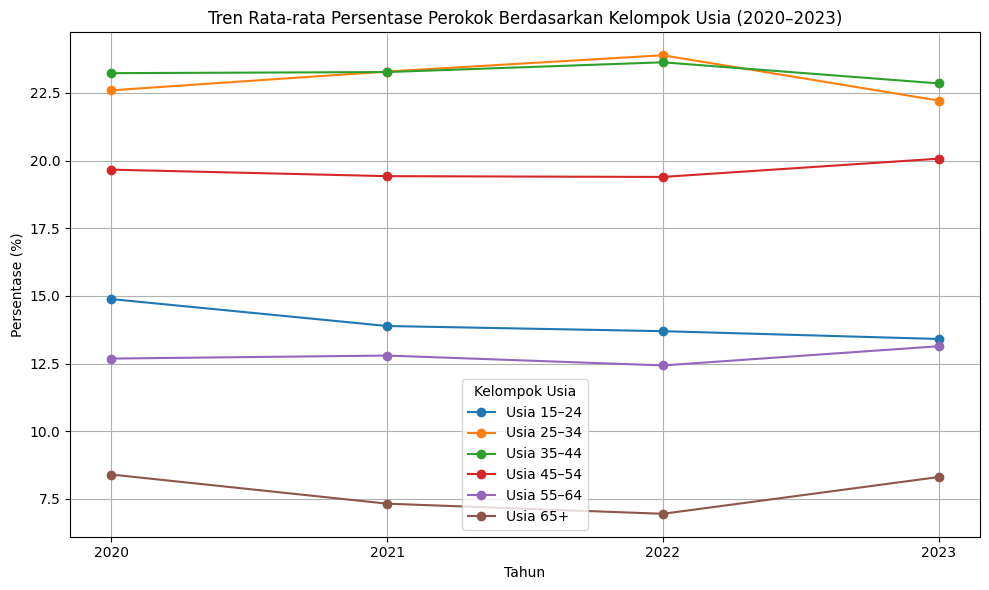

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
df_2020 = pd.read_csv("data_csv/2020.csv")
df_2021 = pd.read_csv("data_csv/2021.csv")
df_2022 = pd.read_csv("data_csv/2022.csv")
df_2023 = pd.read_csv("data_csv/2023.csv")

# Hitung rata-rata setiap kelompok usia dari kolom ke-2 dan seterusnya (kolom ke-1 adalah wilayah)
average_by_year = {
    "2020": df_2020.iloc[:, 1:].astype(float).mean(),
    "2021": df_2021.iloc[:, 1:].astype(float).mean(),
    "2022": df_2022.iloc[:, 1:].astype(float).mean(),
    "2023": df_2023.iloc[:, 1:].astype(float).mean(),
}

# Gabungkan ke dalam DataFrame
age_groups_df = pd.DataFrame(average_by_year)
age_groups_df.index.name = "Kelompok Usia"
age_groups_df.reset_index(inplace=True)

# Buat grafik tren
plt.figure(figsize=(10, 6))

# Buat garis untuk setiap kelompok usia
for i, row in age_groups_df.iterrows():
    usia_label = f'Usia {15 + i*10}–{24 + i*10}' if i < 5 else 'Usia 65+'
    plt.plot(["2020", "2021", "2022", "2023"], row[1:], marker='o', label=usia_label)

# Tambahkan judul dan label
plt.title("Tren Rata-rata Persentase Perokok Berdasarkan Kelompok Usia (2020–2023)")
plt.xlabel("Tahun")
plt.ylabel("Persentase (%)")
plt.legend(title="Kelompok Usia")
plt.grid(True)
plt.tight_layout()
plt.show()


📊 Prediksi Persentase Perokok per Kelompok Usia (2024–2025):
                2024   2025
Kelompok Usia              
15–24          12.82  12.36
25–34          22.86  22.81
35–44          23.05  22.97
45–54          19.93  20.05
55–64          13.01  13.11
65+             7.59   7.52


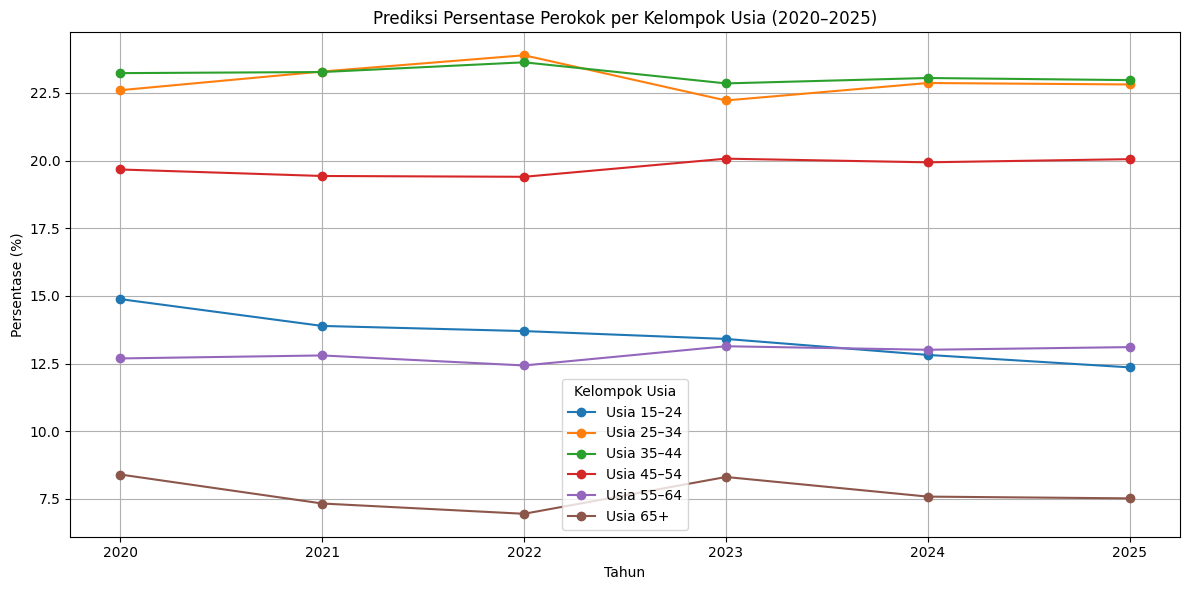

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data historis (2020–2023) persentase perokok per kelompok usia
data = {
    "Kelompok Usia": ["15–24", "25–34", "35–44", "45–54", "55–64", "65+"],
    "2020": [14.88, 22.60, 23.23, 19.67, 12.69, 8.40],
    "2021": [13.89, 23.29, 23.27, 19.43, 12.80, 7.33],
    "2022": [13.70, 23.89, 23.63, 19.40, 12.43, 6.95],
    "2023": [13.41, 22.22, 22.85, 20.07, 13.14, 8.31],
}

# Buat DataFrame
df = pd.DataFrame(data)
df.set_index("Kelompok Usia", inplace=True)

# Tahun untuk pelatihan & prediksi
tahun_hist = np.array([2020, 2021, 2022, 2023]).reshape(-1, 1)
tahun_pred = np.array([2024, 2025]).reshape(-1, 1)
tahun_lengkap = [2020, 2021, 2022, 2023, 2024, 2025]

# Prediksi tiap kelompok usia
prediksi = pd.DataFrame(index=df.index, columns=[2024, 2025])
for usia in df.index:
    y = df.loc[usia].values.reshape(-1, 1)
    model = LinearRegression().fit(tahun_hist, y)
    y_pred = model.predict(tahun_pred).flatten()
    prediksi.loc[usia] = y_pred

# Gabungkan historis dan prediksi
df_all = pd.concat([df, prediksi.astype(float)], axis=1)
df_all.columns = df_all.columns.astype(str)
tahun_lengkap = ["2020", "2021", "2022", "2023", "2024", "2025"]
df_all = df_all[tahun_lengkap]


# Tampilkan prediksi
print("📊 Prediksi Persentase Perokok per Kelompok Usia (2024–2025):")
print(df_all[["2024", "2025"]].round(2))

# Plot visualisasi
plt.figure(figsize=(12, 6))
for usia in df_all.index:
    plt.plot(tahun_lengkap, df_all.loc[usia], marker='o', label=f"Usia {usia}")

plt.title("Prediksi Persentase Perokok per Kelompok Usia (2020–2025)")
plt.xlabel("Tahun")
plt.ylabel("Persentase (%)")
plt.legend(title="Kelompok Usia")
plt.grid(True)
plt.tight_layout()
plt.show()


---

### **Prediksi Persentase Perokok per Kelompok Usia di Jawa Barat (2024–2025)**

Penelitian ini bertujuan untuk menganalisis tren dan memprediksi persentase perokok di Provinsi Jawa Barat berdasarkan kelompok usia untuk tahun 2024 dan 2025. Data yang digunakan berasal dari persentase perokok aktif usia 15 tahun ke atas pada rentang tahun 2020 hingga 2023, yang kemudian dianalisis menggunakan metode regresi linear.

#### **Metode**

Metode yang digunakan adalah **Regresi Linear Sederhana** dari pustaka `scikit-learn` (`LinearRegression`). Untuk setiap kelompok usia, model dibangun berdasarkan data historis (tahun 2020–2023), lalu digunakan untuk memprediksi nilai pada tahun 2024 dan 2025. Visualisasi dilakukan dengan bantuan `matplotlib` agar tren tiap kelompok usia dapat terlihat dengan jelas.

#### **Kelompok Usia yang Dianalisis:**

* 15–24 tahun
* 25–34 tahun
* 35–44 tahun
* 45–54 tahun
* 55–64 tahun
* 65 tahun ke atas

#### **Hasil Prediksi**

Berdasarkan hasil analisis dan prediksi:

* Kelompok usia **15–24 tahun** menunjukkan tren penurunan secara konsisten, mengindikasikan keberhasilan kampanye atau regulasi pengendalian tembakau di kalangan remaja.
* Kelompok usia **25–44 tahun** cenderung stabil namun masih mencatat persentase tertinggi dibanding kelompok usia lainnya.
* Kelompok usia **45 tahun ke atas** memiliki tren yang relatif fluktuatif namun umumnya lebih rendah dari kelompok usia produktif.

Visualisasi tren ini menunjukkan perubahan pola perilaku merokok yang berbeda-beda di tiap kelompok umur, dan dapat digunakan oleh pemerintah atau pihak terkait untuk menyusun kebijakan yang lebih tepat sasaran di masa depan.

#### **Kesimpulan**

Prediksi ini memberikan gambaran awal mengenai tren perokok aktif di Jawa Barat dalam dua tahun mendatang. Walaupun model ini menggunakan pendekatan yang sederhana (regresi linear), hasilnya cukup membantu dalam memahami arah pergerakan data dan mendukung pengambilan keputusan berbasis data. Untuk prediksi yang lebih akurat, disarankan mempertimbangkan faktor eksternal seperti kebijakan pemerintah, harga rokok, dan kampanye anti-merokok sebagai variabel tambahan di masa mendatang.

---

Kalau kamu ingin penjelasan ini diformat sebagai laporan formal (misalnya dalam format makalah atau skripsi), aku bisa bantu strukturkan dengan subbab seperti **Pendahuluan**, **Metodologi**, **Hasil & Pembahasan**, dan **Kesimpulan**. Mau dibuatkan juga?
